In [1]:
import pandas as pd
import numpy as np

In [3]:
#import the dataset
dataset = pd.read_csv('bodyPerformance.csv')

In [4]:
dataset.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
#check the missing values
print(dataset.isnull().sum())

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


In [6]:
#statistical inference about the data
dataset.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [7]:
#get the data type of each variable
dataset.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [8]:
cat_dataset = dataset[['gender']]

In [9]:
# Encoding categorical data
cat_dataset["gender"] = cat_dataset["gender"].astype('category')
cat_dataset['gender'] = cat_dataset["gender"].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
numerical_dataset = dataset.drop(['gender','class'],axis=1)

In [11]:
X=cat_dataset.join(numerical_dataset)

In [12]:
X.columns

Index(['gender', 'age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

gender                        AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                        AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
height_cm                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
weight_kg                  AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
body fat_%                    AxesSubplot(0.125,0.739237;0.168478x0.0639831)
diastolic                  AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
systolic                   AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
gripForce                  AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
sit and bend forward_cm       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
sit-ups counts             AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
broad jump_cm              AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
dtype: object

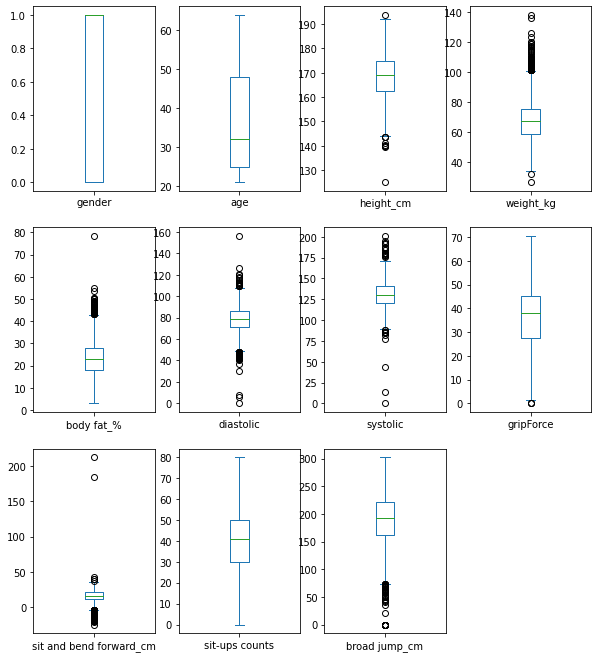

In [13]:
#outiler detection
X.plot(kind="box", subplots=True, layout=(10,4), figsize=(10,40))

There are outliers in the most of the features. So, we have to handle that. We can use robust scaling instead of removing or replacing the outliers by another value.

In [14]:
#robust scaler
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)

In [15]:
#convert array back to dataframe
from pandas import DataFrame
X = DataFrame(X)

In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,-0.217391,0.250000,0.458480,-0.15,0.066667,0.000000,0.960452,0.224490,0.95,0.406780
1,0.0,-0.304348,-0.338710,-0.678363,-0.71,-0.133333,-0.190476,-0.084746,0.010204,0.60,0.610169
2,0.0,-0.043478,0.838710,0.619883,-0.27,0.866667,1.047619,0.389831,-0.428571,0.40,-0.203390
3,0.0,0.000000,0.427419,0.216374,-0.44,-0.200000,0.809524,0.197740,-0.102041,0.60,0.440678
4,0.0,-0.173913,0.370968,0.017544,-0.57,-0.600000,-0.142857,0.316384,1.112245,0.20,0.406780


In [17]:
#rename the columns
X.columns = ['gender','age','height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']
X.head()

,gender,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.0,-0.217391,0.250000,0.458480,-0.15,0.066667,0.000000,0.960452,0.224490,0.95,0.406780
1,0.0,-0.304348,-0.338710,-0.678363,-0.71,-0.133333,-0.190476,-0.084746,0.010204,0.60,0.610169
2,0.0,-0.043478,0.838710,0.619883,-0.27,0.866667,1.047619,0.389831,-0.428571,0.40,-0.203390
3,0.0,0.000000,0.427419,0.216374,-0.44,-0.200000,0.809524,0.197740,-0.102041,0.60,0.440678
4,0.0,-0.173913,0.370968,0.017544,-0.57,-0.600000,-0.142857,0.316384,1.112245,0.20,0.406780


stat = 0.889, p =0.000

Distribution of age variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


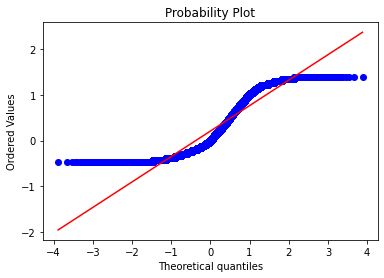

In [18]:
# check the normality of the variables
from scipy.stats import shapiro
import scipy.stats as stats
import pylab

stat , p = shapiro(X['age'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of bhr variable is normal")
else:
    print("Distribution of age variable is not normal")
    
stats.probplot(X['age'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.993, p =0.000

Distribution of age variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


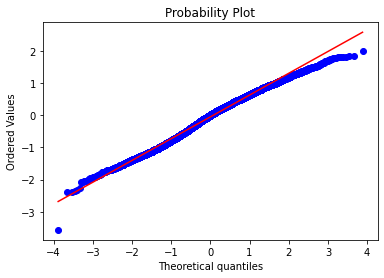

In [19]:
stat , p = shapiro(X['height_cm'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of age variable is normal")
else:
    print("Distribution of age variable is not normal")
    
stats.probplot(X['height_cm'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.989, p =0.000

Distribution of weight_kg variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


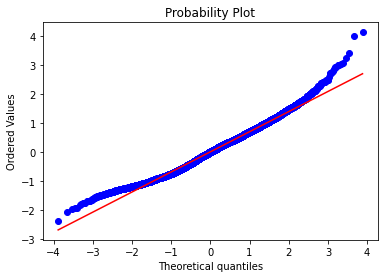

In [20]:
stat , p = shapiro(X['weight_kg'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of weight_kg variable is normal")
else:
    print("Distribution of weight_kg variable is not normal")
    
stats.probplot(X['weight_kg'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.991, p =0.000

Distribution of body fat_% variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


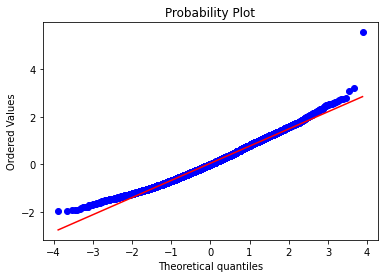

In [21]:
stat , p = shapiro(X['body fat_%'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of body fat_% variable is normal")
else:
    print("Distribution of body fat_% variable is not normal")
    
stats.probplot(X['body fat_%'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.991, p =0.000

Distribution of diastolic variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


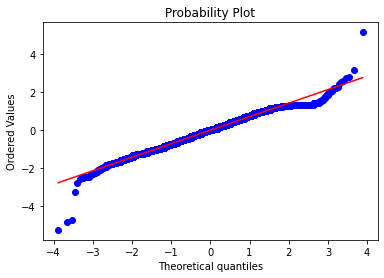

In [22]:
stat , p = shapiro(X['diastolic'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of diastolic variable is normal")
else:
    print("Distribution of diastolic variable is not normal")
    
stats.probplot(X['diastolic'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.989, p =0.000

Distribution of systolic variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


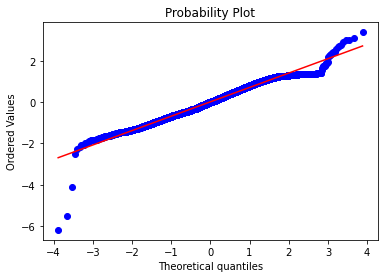

In [23]:
stat , p = shapiro(X['systolic'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of systolic variable is normal")
else:
    print("Distribution of systolic variable is not normal")
    
stats.probplot(X['systolic'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.980, p =0.000

Distribution of gripForce variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


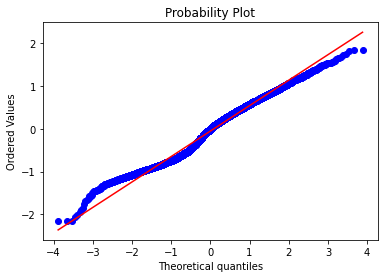

In [24]:
stat , p = shapiro(X['gripForce'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of gripForce variable is normal")
else:
    print("Distribution of gripForce variable is not normal")
    
stats.probplot(X['gripForce'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.917, p =0.000

Distribution of sit and bend forward_cm variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


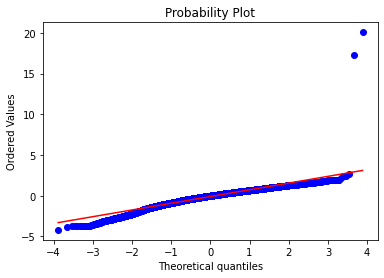

In [25]:
stat , p = shapiro(X['sit and bend forward_cm'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of sit and bend forward_cm variable is normal")
else:
    print("Distribution of sit and bend forward_cm variable is not normal")
    
stats.probplot(X['sit and bend forward_cm'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.981, p =0.000

Distribution of sit-ups counts variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


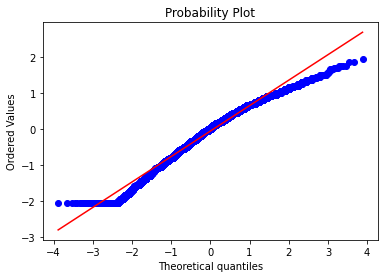

In [26]:
stat , p = shapiro(X['sit-ups counts'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of sit-ups counts variable is normal")
else:
    print("Distribution of sit-ups counts variable is not normal")
    
stats.probplot(X['sit-ups counts'],dist = "norm" , plot = pylab)
pylab.show()

stat = 0.984, p =0.000

Distribution of broad jump_cm variable is not normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


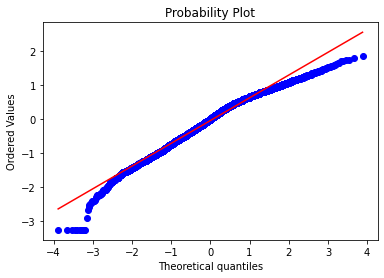

In [27]:
stat , p = shapiro(X['broad jump_cm'])
print('stat = %.3f, p =%.3f\n' % (stat,p))
if p > 0.1:
    print("Distribution of broad jump_cm variable is normal")
else:
    print("Distribution of broad jump_cm variable is not normal")
    
stats.probplot(X['broad jump_cm'],dist = "norm" , plot = pylab)
pylab.show()

We can use yeo-johnson method to transform the distribution of independent features to gaussian distribution.



In [28]:
from sklearn.preprocessing import PowerTransformer
#x = df[feature].to_numpy().reshape(-1, 1)
power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_new = power_transformer.fit_transform(X)

In [29]:
X_new = DataFrame(X_new)

In [30]:
#rename the columns
X_new.columns = ['gender','age','height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']
X_new.head()

,gender,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.0,-0.245097,0.255119,0.437790,-0.152778,0.066879,0.000000,0.964115,0.225466,1.099824,0.432922
1,0.0,-0.358876,-0.329820,-0.724481,-0.765703,-0.132507,-0.190436,-0.084710,0.010206,0.662812,0.667000
2,0.0,-0.044577,0.889685,0.583856,-0.278768,0.896376,1.048598,0.390520,-0.425233,0.428816,-0.196887
3,0.0,-0.000000,0.441790,0.211378,-0.462489,-0.198180,0.810138,0.197927,-0.101832,0.662812,0.471177
4,0.0,-0.191607,0.381929,0.017508,-0.606818,-0.585419,-0.142834,0.316847,1.131818,0.207459,0.432922


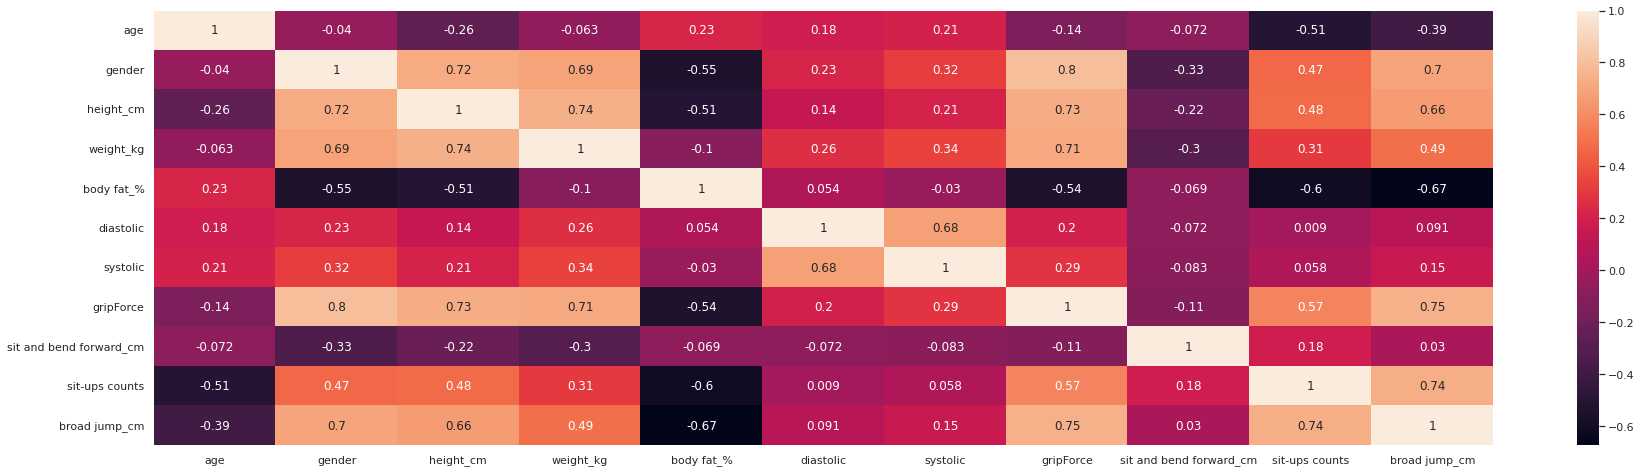

In [31]:
#find the correlation between each variabl
import seaborn as sns
corelation = X_new[['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']].corr()
sns.set(rc = {'figure.figsize':(30,8)})
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [32]:
#find the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = X_new[['age','height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm']]

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

                   feature       VIF
0                      age  1.637544
1                height_cm  4.153092
2                weight_kg  4.944718
3               body fat_%  3.346389
4                diastolic  1.883227
5                 systolic  2.023802
6                gripForce  4.212811
7  sit and bend forward_cm  1.219037
8           sit-ups counts  2.851373
9            broad jump_cm  4.068735


All the VIF values are less than 10. Therefore, there is no multicollinearity

In [35]:
# Replace categorical values with numbers#
dataset['class'].value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

In [36]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.0 MB/s 
     |████████████████████████████████| 135 kB 42.8 MB/s 
     |████████████████████████████████| 1.6 MB 60.9 MB/s 


In [37]:
import tensorflow as tf

import autokeras as ak


In [38]:
#Define the dependent variable that needs to be predicted (labels)
y = dataset["class"].values

In [39]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) 

In [40]:
X_new.columns

Index(['gender', 'age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [41]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.25, random_state=42)

In [42]:
# define the model using auto keras
clf = ak.StructuredDataClassifier(max_trials = 10) #there are 10 models to train
clf.fit(X_train, y_train, verbose=1, epochs=10)

Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.6060606241226196

Best val_accuracy So Far: 0.6060606241226196
Total elapsed time: 00h 02m 51s
Epoch 1/10
314/314 [==============================] - 1s 3ms/step - loss: 1.1093 - accuracy: 0.4814
Epoch 2/10
314/314 [==============================] - 1s 3ms/step - loss: 0.9349 - accuracy: 0.5779
Epoch 3/10
314/314 [==============================] - 1s 3ms/step - loss: 0.8938 - accuracy: 0.6041
Epoch 4/10
314/314 [==============================] - 1s 3ms/step - loss: 0.8703 - accuracy: 0.6192
Epoch 5/10
314/314 [==============================] - 1s 3ms/step - loss: 0.8546 - accuracy: 0.6285
Epoch 6/10
314/314 [==============================] - 1s 3ms/step - loss: 0.8424 - accuracy: 0.6354
Epoch 7/10
314/314 [==============================] - 1s 3ms/step - loss: 0.8333 - accuracy: 0.6413
Epoch 8/10
314/314 [==============================] - 1s 3ms/step - loss: 0.8260 - accuracy: 0.6450
Epoch 9/10
314/314 [==============================] - 1s 

In [43]:
#Evaluate the classifier on test data
_, acc = clf.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

105/105 [==============================] - 1s 2ms/step - loss: 0.8602 - accuracy: 0.6226
Accuracy =  62.25739121437073 %


In [45]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

105/105 [==============================] - 0s 2ms/step


In [48]:
# get the final best performing model
model = clf.export_model()
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 11)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  